<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_1_Course_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEEK_1**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
# kmeans :Starts by guessing the initial centroids, and then
#Refines this guess by :Repeatedly assigning examples to their closest centroids, and then,Recomputing the centroids based on the assignments.
#The k-means algorithm will always converge to some final set of means for the centroids.
#However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
#One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion)

from google.colab import drive
drive.mount('/content/drive')
data_path ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/ex7_X.npy"

def load_data (file_path):
  x =np.load(file_path)
  return x

x =load_data(data_path) #has two features and shape (300,2)

# let's explore our data
print("First rive elements of x are :\n",x[:5])
print("the shape of x is",x.shape)


# function to fined closest_centroids
def find_closest_centroids(x,centroids) :
  #return idx(aray), on shape (m,) it contain sigle value for each example if this value is 2 means example one on cluster number 2
  # if it's 5 means example 2 on cluster 5

  #set number of number of clusters
  k =centroids.shape[0] # intialized centroid cout and values we have to set them first using kMeans_init_centroids function
  #create array to save indexis on it
  idx =np.zeros(x.shape[0],dtype =int)

  for i in range(x.shape[0]):
    distance =[]
    for j in range(centroids.shape[0]):
      normal_ij_L2 =np.linalg.norm(x[i]-centroids[j])
      distance.append(normal_ij_L2)
    idx[i] =np.argmin(distance) # index number on distance list it's same index ordering of centroids

  return idx




#select centroids "we did manulay here and these values are not exist on out origianl dataset x "
# in reality K_manes choose values randomly as initialized centroids from the dataset itself
initial_centroids = np.array([[3,3], [6,2], [8,5]]) #not that we have 3 cluster categories count of clusters starts from 0,1,2
idx = find_closest_centroids(x, initial_centroids)

print("\nFirst three elements in idx are ",idx[:3])

#Compute centroids
def compute_centroids(x,idx,k):
  #x dataset on shape of (m,n)
  #idx array contain index of centroids
  #k is number of examples
  m,n =x.shape
  centroids =np.zeros((k,n)) # centroids is array on shape of number of examples and features
  for k in range(k):
    points =x[idx==k]
    centroids[k] =np.mean(points,axis =0)
  return centroids

# let's check this function
k = 3
centroids = compute_centroids(x,idx,k)
print("The centroids are :", centroids)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First rive elements of x are :
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
the shape of x is (300, 2)

First three elements in idx are  [0 2 1]
The centroids are : [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [53]:

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)



def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plt.scatter(X[:, 0], X[:, 1], c=idx)     # plots data points in X, coloring them so that those with the same


    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)

    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])

    plt.title("Iteration number %d" %i)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


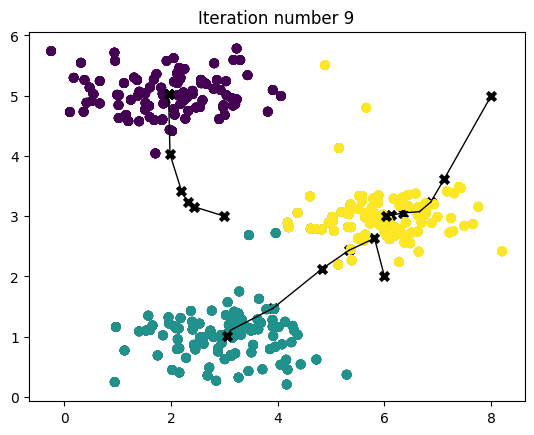

In [58]:
# we need to do all preveious steps on a loop
def run_kmeans(x,initial_centroids,max_iters =10,plot_progress =False):
  m,n =x.shape
  k =initial_centroids.shape[0] #it looks we will provide this initial_centroids manualy
  centroids =initial_centroids
  previuos_centroids =centroids
  idx =np.zeros(m)
  for i in range(max_iters):
    print("K-Means iteration %d/%d" % (i, max_iters-1)) #output progress
    idx =find_closest_centroids(x,centroids)
    if plot_progress:
      plot_progress_kMeans(x,centroids,previuos_centroids,idx,k,i)
      previuos_centroids =centroids

    centroids =compute_centroids(x,idx,k)
  plt.show()
  return centroids,idx

#let's chcek this code with new centroids
x =load_data(data_path)
intial_centroids =np.array([[3,3],[6,2],[8,5]])
k = 3
max_iters = 10

centroids, idx = run_kmeans(x, initial_centroids, max_iters, plot_progress=True)

In [59]:
#a good strategy for initializing the centroids is to select random examples from the training set

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])  #his function generates a random permutation of integers from 0 to ,It returns a new array containing the shuffled indices, but it doesn't modify the input array itself.

    # Take the first K points as initial centroids, where k is numer of cetroids you want to assign examples to it
    centroids = X[randidx[:K]]

    return centroids


###IMage compression with k_means

Shape of original_img is : (128, 128, 3)


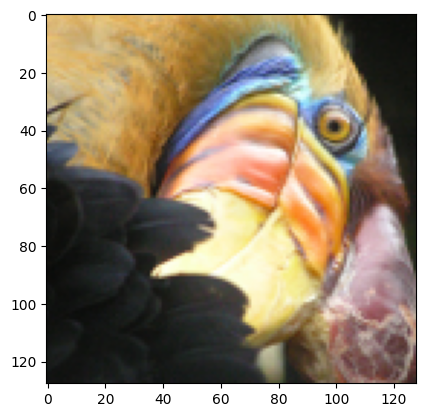

In [81]:
#n a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
#    Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
#Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.

#load image
original_image =plt.imread("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/bird_small.png")
#visualize image
plt.imshow(original_image)
#cehck dimensions of shape
print("Shape of original_img is :",original_image.shape)

#To call the run_kMeans, you need to first transform the matrix original_img into a two-dimensional matrix.
#new shape is m*3 where m is 128*128
original_img =original_image/255
x_img =np.reshape(original_image,(original_img.shape[0]*original_img.shape[1],3))


In [82]:
#k-means on image pixels
k =16
max_iters =10
initial_centroids =kMeans_init_centroids(x_img,k)# initlaize centroids from pixels of images
centroids,idx =run_kmeans(x_img,initial_centroids ,max_iters)


print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

#After finding the top colors to represent the image, you can now assign each pixel position to its closest centroid using the find_closest_centroids function.
#previus image needs =128*128*24 =393216
#new image needs = 16*24+128*128*4 =6520
print("\nx_img shape",x_img.shape)
print("centroids shape", centroids.shape)
print("idx shape",idx.shape)


# Represent image in terms of indices
x_recovered = centroids[idx, :] # so we go to each on reshaped image and represnet it's value with coressponding centroids,but here we created new image with the centroids

# Reshape recovered image into proper dimensions
x_recovered_ = np.reshape(x_recovered, original_img.shape)



K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Shape of idx: (16384,)
Closest centroid for the first five elements: [8 8 8 8 8]

x_img shape (16384, 3)
centroids shape (16, 3)
idx shape (16384,)


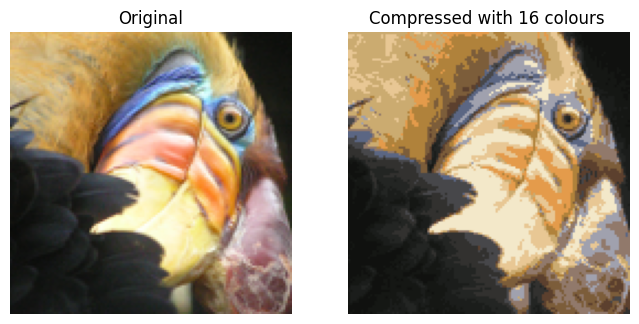

In [95]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(np.clip(x_recovered_ * 255, 0, 255).astype(np.uint8))
ax[1].set_title('Compressed with %d colours '%16)
ax[1].set_axis_off()

In [86]:
unique_elements_per_row = np.apply_along_axis(np.unique, axis=0, arr=x_recovered)
print("number of  unique elements ",len(unique_elements_per_row))
print("Unique elements along each row:", unique_elements_per_row)

number of  unique elements  16
Unique elements along each row: [[0.06373162 0.06941839 0.05952697]
 [0.08509383 0.0921082  0.08112462]
 [0.10782772 0.11638547 0.10670269]
 [0.14050432 0.14792055 0.13905038]
 [0.19677189 0.1928241  0.18097448]
 [0.28115439 0.25179783 0.18775281]
 [0.3579405  0.27889735 0.22803424]
 [0.36165354 0.36498526 0.23521741]
 [0.48760483 0.40231252 0.2914944 ]
 [0.56892765 0.4759191  0.29563272]
 [0.62877476 0.50994331 0.42061904]
 [0.69334882 0.60860223 0.43952504]
 [0.79881835 0.63300413 0.51711297]
 [0.89713234 0.67382014 0.5824573 ]
 [0.91245306 0.78393871 0.68325311]
 [0.95373809 0.91307777 0.78951269]]


In [92]:
np.max(x_recovered_)

0.9537380933761597

In [90]:
x_recovered_.shape

(128, 128, 3)